# Part 2: Resampling and confidence intervall

In [1]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from model_resample import model_resample
from utils import generateDesignmatrix, franke_function, ci, plotCI, clean_reg_coeff
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib notebook 
# creates the toolbars with zoom buttons on plots.

## Franke function 

In [2]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
z = franke_function(x, y)
p = 5 
X = generateDesignmatrix(p,x,y)

In [3]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}
nboots = 100

In [4]:
mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train = model_resample(models, lmd, X, z, nboots, split_size = 0.2)

<IPython.core.display.Javascript object>


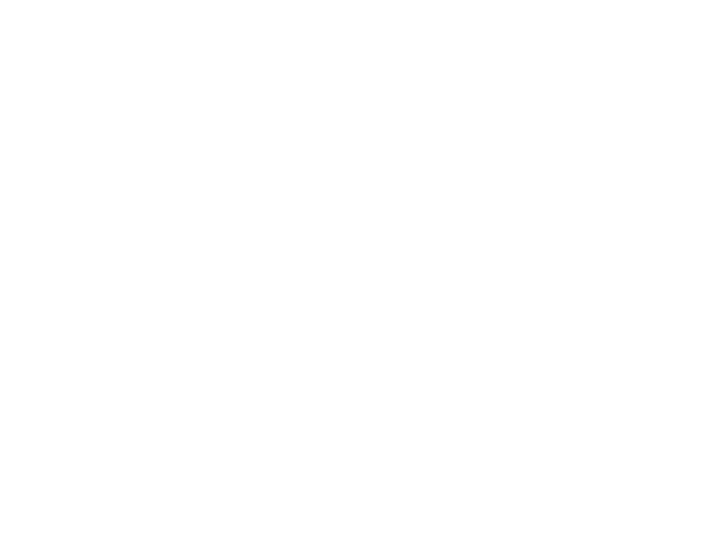

In [5]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals of test data for Ridge, OLS and Lasso - Franke function", fontsize = 15)
plt.savefig("Confidenceintervall_Franke.png")
plt.show()

In [6]:
mse_avg_test, mse_avg_train
# train has a lower value than test. OK!

({'lasso': 0.022806919603708672,
  'ols': 0.0021228109384389604,
  'ridge': 0.005145179312026934},
 {'lasso': 0.022577725061877395,
  'ols': 0.001982453856398759,
  'ridge': 0.005033401779774265})

In [7]:
r2_avg_test, r2_avg_train 
# train is higher than test. OK!

({'lasso': 0.7146394637495309,
  'ols': 0.9733591221306397,
  'ridge': 0.9355992165763112},
 {'lasso': 0.7185448607862245,
  'ols': 0.9752805210879373,
  'ridge': 0.9372390693678334})

In [8]:
bias_model_test, bias_model_train

({'lasso': 0.00020121746593804168,
  'ols': 0.00036924259151971395,
  'ridge': 0.0005736262659065683},
 {'lasso': 0.000678351630323315,
  'ols': 0.0006783516306623771,
  'ridge': 0.0006897831665882426})

In [9]:
mv_test, mv_train

({'lasso': 6.683542608243442e-16,
  'ols': -6.550315845288424e-16,
  'ridge': 7.30526750203353e-16},
 {'lasso': -3.586020369539255e-15,
  'ols': -4.360956040727615e-15,
  'ridge': -3.108624468950438e-16})

## Real data: Flekkefjord 

In [10]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}
nboots = 100

In [11]:
terrain_F = imread("Flekkefjord.tif")

lengthx = 100
lengthy = 100
x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

#x = np.arange(lengthx)
#y = np.arange(lengthy)

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p = 3 
X = generateDesignmatrix(p, x, y)
print(X.shape)

(10000, 10)


/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/hanna/anaconda3/lib/python3.6/site-packages/imageio/plugins/_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitorder'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))


In [12]:
mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train   = model_resample(
    models, lmd, X, z, nboots, split_size = 0.2)

/home/hanna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [13]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)

<IPython.core.display.Javascript object>


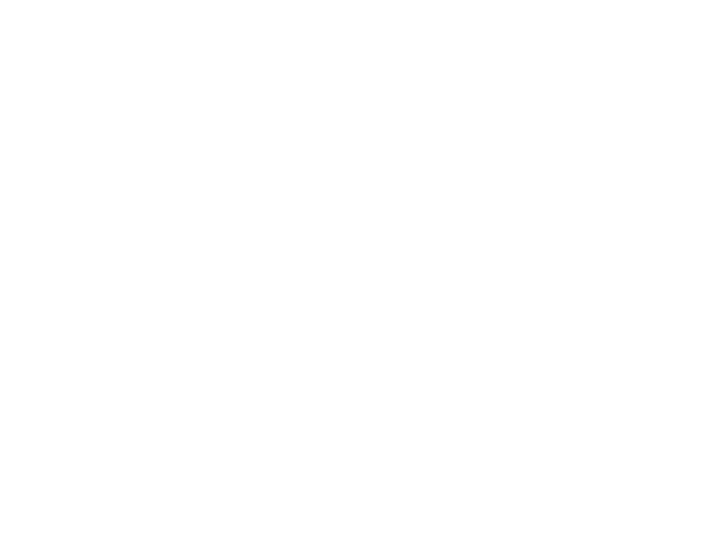

In [14]:
%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Flekkefjord", fontsize = 15)
plt.savefig("Confidenceintervall_F.png")
plt.show()

In [15]:
mse_avg_test, mse_avg_train

({'lasso': 138939.6868790264,
  'ols': 3639050336.797901,
  'ridge': 144809.14609489212},
 {'lasso': 138881.02050427138,
  'ols': 3722493822.5570965,
  'ridge': 144818.89175464975})

In [16]:
r2_avg_test, r2_avg_train

({'lasso': 0.0029534465271376974,
  'ols': -26057.508057273804,
  'ridge': -0.039447056050400636},
 {'lasso': 0.0037060665028282435,
  'ols': -26715.705898738153,
  'ridge': -0.03896092009719545})

In [17]:
bias_model_test, bias_model_train

({'lasso': 273.08845340308994,
  'ols': 3212.9211480456966,
  'ridge': 272.92335962320783},
 {'lasso': 273.11608427307783,
  'ols': 3303.78610610195,
  'ridge': 272.90485361077685})

In [18]:
# model variance
mv_test, mv_train

({'lasso': -4.4906300900038334e-13,
  'ols': -2.1667801775038243e-10,
  'ridge': 5.528590918402188e-12},
 {'lasso': 5.873630470887292e-11,
  'ols': -5.913316272199154e-09,
  'ridge': 3.0008777684997765e-11})

## Real data: Montevideo

In [19]:
terrain_M = imread("Montevideo.tif")

x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

#x = np.arange(lengthx)
#y = np.arange(lengthy)

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p = 3
X = generateDesignmatrix(p, x, y)
z = np.ndarray.flatten(terrain_M)

#mse_M, r2_M, reg_coeffs_M, bias_M, model_variance_M

mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train   = model_resample(
    models, lmd, X, z, nboots, split_size = 0.2)

/home/hanna/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<IPython.core.display.Javascript object>


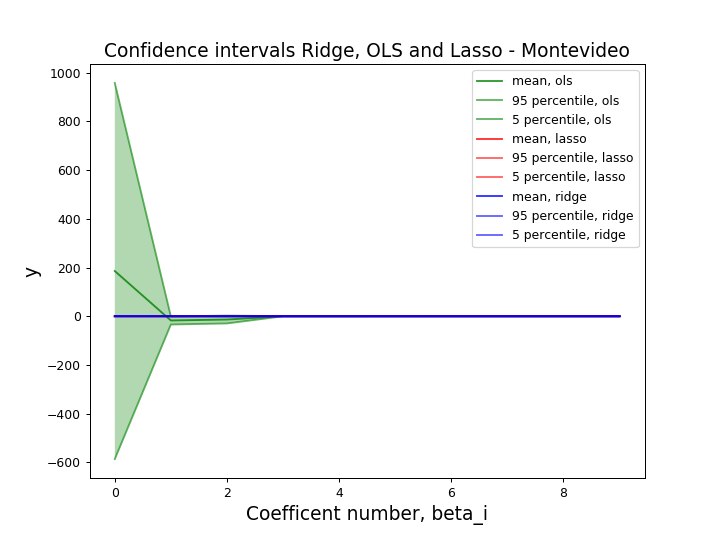

In [20]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
"""
a - mean ridge 
b - ci high 
c - ci lox

2. ols
3. lasso
"""

%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Montevideo", fontsize = 15)
plt.savefig("Confidenceintervall_M.png")
plt.show()

In [21]:
mse_avg_test, mse_avg_train

({'lasso': 475.59012693143353,
  'ols': 239164156.6062987,
  'ridge': 593.3968680964391},
 {'lasso': 474.7450695040965,
  'ols': 239138490.7578372,
  'ridge': 591.3677775948055})

In [22]:
r2_avg_test, r2_avg_train

({'lasso': -0.00039577282993892625,
  'ols': -505707.5316112497,
  'ridge': -0.24939968964534065},
 {'lasso': 0.001042265014200886,
  'ols': -503187.88702715305,
  'ridge': -0.24469540418010438})

In [23]:
bias_model_test, bias_model_train

({'lasso': 60.30371513088667,
  'ols': 2666.3859026636032,
  'ridge': 59.62778565588411},
 {'lasso': 60.304108745093686,
  'ols': 2667.667392248771,
  'ridge': 59.62251913229724})

In [24]:
mv_test, mv_train

({'lasso': 2.3507595869887153e-12,
  'ols': 3.017521521542221e-10,
  'ridge': -2.4562041289755144e-12},
 {'lasso': 7.410392299789237e-12,
  'ols': -5.430229066405445e-10,
  'ridge': 5.9900173710047965e-12})